
## Kemeel Kebede - kemeeel.kebede@baruchmail.cuny.edu
## Anthony Esposito - anthony.esposito5@baruchmail.cuny.edu
## Wen Bi - wen.bi@baruchmail.cuny.edu
### Project Objective: To analyze NY housing market data and NY salary data.
#### Our project aims to find if there is a positive or negative correlation between salary and house prices in New York over a time span of 2012-2019.

## Data Source Links
### https://www.deptofnumbers.com/income/new-york/
### https://www.zillow.com/research/data/

### link for the CSV file (originally from Zillow.com)
#### https://drive.google.com/file/d/13X5PMy_W_hOgMOVLC8W0x5Eg8l34IsfX/view?usp=sharing

In [ ]:
#importing libraries needed to complete the project
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from lxml import html
import re
import matplotlib.pyplot as plt

#Part 1: Web Scraping

In [ ]:
#setting up the url and testing the page
url = 'https://www.deptofnumbers.com/income/new-york/'

#testing if the page is responsive (200 means yes)
test = requests.get(url)
print(test)

<Response [200]>


In [ ]:
#getting the number of tables on the page (since there are multiple)
page = requests.get(url).text

soup = bs(page, "lxml")
tab = soup.find_all("table", attrs={"class": "stdtable"})
print("Number of tables on site: ",len(tab))

Number of tables on site:  6


In [ ]:
#getting all the table headings in one place
table1 = tab[0]

body = table1.find_all("tr")

head = body[0]
body_rows = body[1:]

#getting and storing the table head that we need
heads = []
for item in head.find_all("th"):
    item = (item.text).rstrip("\n")
    heads.append(item)
print(heads)

['Date', 'US', 'New York']


In [ ]:
#getting all the table rows(data) in one place
table_rows = []
for row_num in range(len(body_rows)):
    row = []
    for row_item in body_rows[row_num].find_all("td"):
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        row.append(aa)
    table_rows.append(row)

print(table_rows)

[['2019', '$65712', '$72108'], ['2018', '$63059', '$69074'], ['2017', '$62927', '$67680'], ['2016', '$61383', '$67021'], ['2015', '$60187', '$65664'], ['2014', '$58001', '$63645'], ['2013', '$57437', '$63064'], ['2012', '$57307', '$62971'], ['2011', '$57531', '$62936'], ['2010', '$58809', '$63629'], ['2009', '$59988', '$65289'], ['2008', '$61932', '$66698'], ['2007', '$62717', '$66145'], ['2006', '$61586', '$65314'], ['2005', '$60684', '$64933']]


# PART 2: Numpy + pandas ADD PumPy & Panda functionality

In [ ]:
#making pandas functionality for the income data
income_table = pd.DataFrame(data=table_rows)

#double checking the data
income_table.head()

,0,1,2
0,2019,$65712,$72108
1,2018,$63059,$69074
2,2017,$62927,$67680
3,2016,$61383,$67021
4,2015,$60187,$65664


In [ ]:
#checking that all the data was imported correctly
income_table.shape

(15, 3)

In [ ]:
#this code is to load the CSV file into Colab
#(different code needed for Jupyter Notebook)
from google.colab import files
uploaded = files.upload()

Saving pr.csv to pr (1).csv


In [ ]:
#creating a pandas table with our CSV file from Zillow of prices across the 
#nation (we will bring it down to just NY in part 3 to fit the scope of 
#the project) us_prices variable represents the US housing market prices
us_prices = pd.read_csv('pr.csv')

In [ ]:
#checking that all the data transferred from the csv file from Zillow
us_prices

,RegionID,SizeRank,RegionName,RegionType,StateName,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
0,102001,0,United States,Country,NaN,167903.0,171334.0,174663.0,175846.0,176117.0,...,300438.0,307432.0,313190.0,317623.0,320147.0,322015.0,324521.0,327814.0,332102.0,334323.0
1,394913,1,"New York, NY",Msa,NY,352858.0,356995.0,361310.0,362366.0,361748.0,...,481624.0,489883.0,497344.0,505139.0,509247.0,514403.0,518050.0,521544.0,521384.0,524472.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,371538.0,375081.0,377665.0,377458.0,383023.0,...,760143.0,776038.0,794142.0,807101.0,814819.0,817378.0,821448.0,826084.0,830980.0,841980.0
3,394463,3,"Chicago, IL",Msa,IL,170417.0,176642.0,182257.0,184817.0,184884.0,...,271413.0,272906.0,276302.0,277441.0,278258.0,277207.0,279854.0,284606.0,289132.0,290851.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,157352.0,159531.0,160625.0,160675.0,159957.0,...,311111.0,319231.0,329023.0,338881.0,346938.0,349903.0,351258.0,353320.0,355148.0,359372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,394528,90,"Daytona Beach, FL",Msa,FL,114970.0,119783.0,118880.0,116507.0,116240.0,...,260944.0,267348.0,269499.0,272225.0,275021.0,281189.0,285338.0,287957.0,290574.0,298131.0
91,394531,91,"Des Moines, IA",Msa,IA,145928.0,151971.0,154134.0,152974.0,153711.0,...,242693.0,244039.0,245921.0,247059.0,248461.0,252746.0,258909.0,263965.0,266361.0,267675.0
92,395006,100,"Provo, UT",Msa,UT,175506.0,176395.0,178817.0,179978.0,183436.0,...,402024.0,417704.0,433510.0,445128.0,450701.0,456660.0,466131.0,472249.0,479530.0,485626.0
93,394549,104,"Durham, NC",Msa,NC,185614.0,189453.0,194922.0,191976.0,191962.0,...,314042.0,325233.0,340772.0,351381.0,363362.0,367872.0,373779.0,380619.0,386999.0,391610.0


# PART 3: Data Combine, Merge, Load highlight

In [ ]:
#getting rid of the irrelevant column
income_table.drop(1, axis='columns', inplace=True)

#switching the rows and columns to make it more easily readable
income_table = income_table.transpose()

#double checking the data
income_table.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
2,$72108,$69074,$67680,$67021,$65664,$63645,$63064,$62971,$62936,$63629,$65289,$66698,$66145,$65314,$64933


In [ ]:
#getting rid of the irrelevant rows
for x in range (8,15):
    income_table.drop(x, axis='columns', inplace=True)

income_table.head()

,0,1,2,3,4,5,6,7
0,2019,2018,2017,2016,2015,2014,2013,2012
2,$72108,$69074,$67680,$67021,$65664,$63645,$63064,$62971


In [ ]:
#this loop takes the values with a ".0" and takes it away so the data is clean
for x in range(0,8):
    temp = income_table.iat[1,x]
    temp = str(temp)
    temp = temp[1:6]
    income_table.iat[1,x] = int(temp)
    x=+1

#we need to transpose to make the table readable for matplotlib
income_table = income_table.transpose()

#the datatype is object, and we need it to be int64 for matplotlib
#we will just end up casting the dataframe to int64 for Matplotlib
income_table.dtypes

0    object
2    object
dtype: object

In [ ]:
#we have to drop the indexes or MatPlotLib will use the indexes to plot
income_table = income_table.set_index(0)

#checking that the indexes were dropped correctly
income_table.head()

,2
0,
2019,72108
2018,69074
2017,67680
2016,67021
2015,65664


In [ ]:
#we have to sort by 2012-2019, because it is in reverse right now
income_table = income_table.sort_index(axis=0, level=None, ascending=True)

#checking that the sorting worked correctly
income_table.head()

,2
0,
2012,62971
2013,63064
2014,63645
2015,65664
2016,67021


In [ ]:
#getting rid of the first column of data that is not needed
us_prices.drop(0, axis='rows', inplace=True)

#looping so that we do not have to have 90+ lines of code to do this task
for x in range(2,95):
    us_prices.drop(x, axis='rows', inplace=True)

#changing the variable name to correctly match the data
#ny_prices represents that we have culled the data down to just New York
#housing data
ny_prices = us_prices

In [ ]:
#we dont need all of the specific things like the ID and types and such
#we only need the numbers because we know what the data shows
#the code below gets rid of all the irrelevant columns
ny_prices.drop('RegionID', axis='columns', inplace=True)
ny_prices.drop('SizeRank', axis='columns', inplace=True)
ny_prices.drop('RegionName', axis='columns', inplace=True)
ny_prices.drop('RegionType', axis='columns', inplace=True)
ny_prices.drop('StateName', axis='columns', inplace=True)

#double checking the data again to make sure it only shows New York Data
ny_prices.head()

,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
1,352858.0,356995.0,361310.0,362366.0,361748.0,369707.0,370226.0,372958.0,362175.0,359896.0,...,481624.0,489883.0,497344.0,505139.0,509247.0,514403.0,518050.0,521544.0,521384.0,524472.0


In [ ]:
#this loop takes the values with a ".0" and takes it away so the data is clean
for x in range(0,117):
    temp = ny_prices.iat[0,x]
    temp = str(temp)
    temp = temp[:-2]
    ny_prices.iat[0,x] = temp
    x=+1

In [ ]:
#checking some of the data
print(ny_prices)

  2012-04-30 2012-05-31 2012-06-30 2012-07-31 2012-08-31 2012-09-30  \
1     352858     356995     361310     362366     361748     369707   

  2012-10-31 2012-11-30 2012-12-31 2013-01-31  ... 2021-03-31 2021-04-30  \
1     370226     372958     362175     359896  ...     481624     489883   

  2021-05-31 2021-06-30 2021-07-31 2021-08-31 2021-09-30 2021-10-31  \
1     497344     505139     509247     514403     518050     521544   

  2021-11-30 2021-12-31  
1     521384     524472  

[1 rows x 117 columns]


In [ ]:
#averaging the costs in the housing dataset
#since the csv is in months, we have to put it into year format
total = 0

#we need a special loop for 2012 because it is not a complete 12 months
for x in range(0,9):
    temp = ny_prices.iat[0,x]
    total = total + int(temp)


#creating a dictionary to put the averaged values in
avg_price_dict = {2012:int(total/9)}

#the next loop goes through the rest of the months in the csv file
#it averages them, then inserts the average into the dictionary

#this variable represents the first in the range
f = 9
#this variable represents the last in the range
l = 21
#this variable is tracking the year we are averaging
year = 2013

while year < 2020:
    total = 0
    for x in range(f,l):
        temp = ny_prices.iat[0,x]
        total = total + int(temp)
    avg_price_dict[int(year)] = int(total/12)
    year = year + 1
    f = f + 12
    l = l + 12

In [ ]:
#looking at the output of the dictionary
print(avg_price_dict)

{2012: 363371, 2013: 363481, 2014: 371127, 2015: 379846, 2016: 386460, 2017: 402296, 2018: 411928, 2019: 418640}


In [ ]:
#creating a new panda dataframe with the clean and averaged out data
avg_price = pd.DataFrame(data=avg_price_dict, index=[0])

#transposing so that we can use it with matplotlib
avg_price = avg_price.transpose()

#checking the data
avg_price.head()

,0
2012,363371
2013,363481
2014,371127
2015,379846
2016,386460


In [ ]:
#Checking that avg_price is in the correct format
avg_price.dtypes

0    int64
dtype: object

### The code below will calculate the percent change between the data over the years and store them in dataframes.

In [ ]:
#creating empty lists for later use
percent_income_change = []
percent_houses_change = []

In [ ]:
#creating a temporary int variable to temporarily store data
tem = 0.0

#finding the percent change in the housng price dataframe
for i in range(7):
    tem = avg_price.iat[i+1,0] - avg_price.iat[i,0]
    tem = tem / avg_price.iat[i,0]
    tem = tem * 100
    percent_houses_change.append(round(tem, 2))

print('housing percent change = ' + str(percent_houses_change))

housing percent change = [0.03, 2.1, 2.35, 1.74, 4.1, 2.39, 1.63]


In [ ]:
#finding the percentage change in the income dataframe
for i in range(7):
    tem = income_table.iat[i+1,0] - income_table.iat[i,0]
    tem = tem / income_table.iat[i,0]
    tem = tem * 100
    percent_income_change.append(round(tem, 2))

print('income percent change = ' + str(percent_income_change))

income percent change = [0.15, 0.92, 3.17, 2.07, 0.98, 2.06, 4.39]


In [ ]:
#creating an empty dataframe to hold the percent change data
percent_changes = pd.DataFrame()

#appending the lists to the new dataframe
percent_changes['House Prices'] = percent_houses_change
percent_changes['Income'] = percent_income_change

print(percent_changes)

   House Prices  Income
0          0.03    0.15
1          2.10    0.92
2          2.35    3.17
3          1.74    2.07
4          4.10    0.98
5          2.39    2.06
6          1.63    4.39


# PART 4: Visualization

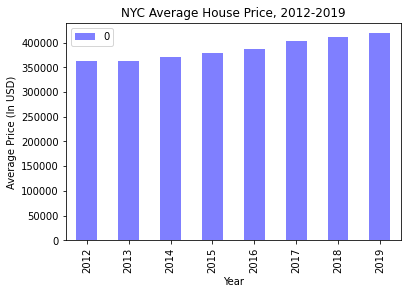

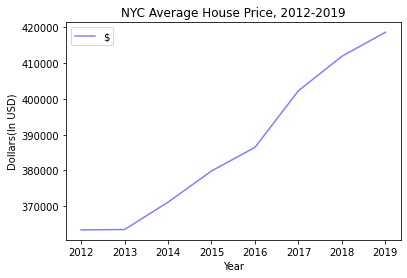

In [ ]:
#creating bar graph for housing prices
avg_price.plot(kind='bar', alpha=0.5, stacked=True, color='blue')
plt.title('NYC Average House Price, 2012-2019')
plt.ylabel('Average Price (In USD)')
plt.xlabel('Year')
plt.show()

#creating line graph for housing prices
avg_price.plot(kind='line', alpha=0.5, stacked=True, color='blue')
plt.title('NYC Average House Price, 2012-2019')
plt.ylabel('Dollars(In USD)')
plt.xlabel('Year')
plt.legend(['$'])
plt.show()

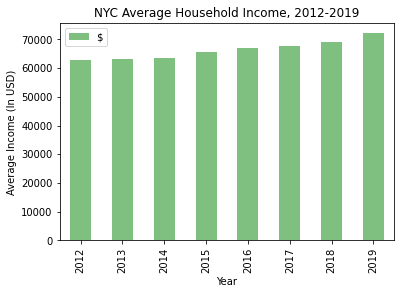

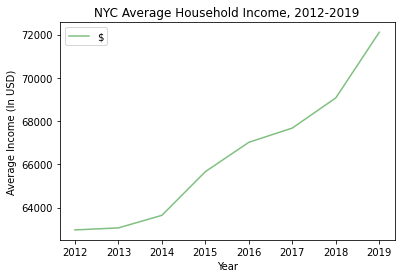

In [ ]:
#creating bar graph for income
income_table.astype('int64').plot(kind='bar', alpha=0.5, stacked=True, color='green')
plt.title('NYC Average Household Income, 2012-2019')
plt.ylabel('Average Income (In USD)')
plt.xlabel('Year')
plt.legend(['$'])
plt.show()

#creating line graph for income
income_table.astype('int64').plot(kind='line', alpha=0.5, stacked=True, color='green')
plt.title('NYC Average Household Income, 2012-2019')
plt.ylabel('Average Income (In USD)')
plt.xlabel('Year')
plt.legend(['$'])
plt.show()

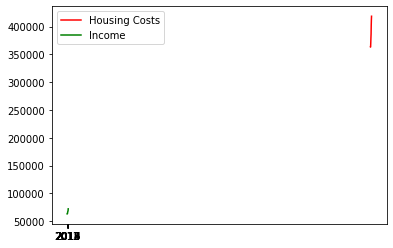

In [ ]:
#showing both datasets one one line graph(not so useful, just there to have it)
plt.plot(avg_price, color='r', label='Housing Costs')
plt.plot(income_table.astype('int64'), color='g', label='Income')
plt.legend()
plt.show()

# The chart below is arguably the most important one because it encompasses the whole project

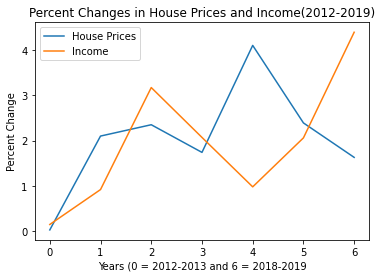

In [ ]:
#creating a line graph that compares the percent changes
percent_changes.plot(kind='line', stacked=False)
plt.title('Percent Changes in House Prices and Income(2012-2019)')
plt.ylabel('Percent Change')
plt.xlabel('Years (0 = 2012-2013 and 6 = 2018-2019')
plt.legend()
plt.show()

#References
### general coding errors and syntax - https://stackoverflow.com/
### pandas - https://pandas.pydata.org/docs/reference/frame.html
### MatPlotLib Documentation - https://matplotlib.org/stable/api/matplotlib_configuration_api.html#
### How to cast a DataFrame - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
### How to take away the index from a dataframe - https://www.delftstack.com/howto/python-pandas/pandas-remove-index/#remove-index-of-a-pandas-dataframe-using-the-set-index-method